# US Oil and Gas Production

---

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

---

## Let's load the Gas production:

In [4]:
file = "U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [5]:
# Gives us an idea about the number of months in the data and columns
gas_df.shape

(121, 20)

In [6]:
# Gives us more detialed information about the states
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [7]:
# Checking the types of the first two columns. Month is apparently not datetime yet
gas_df.dtypes[0:2]

Month    object
U.S.      int64
dtype: object

In [8]:
# Describe gives us a summary of statistical parameters
gas_df.describe()

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,82362.421488,8836.561983,2502.661157,797.611570,2297.272727,4327.561983,5867.413223,2324.578512,1161.181818,8309.314050,22249.553719,5962.652893,1738.628099,1022.066116,3624.884298,194.809917,5961.115702,4484.595041,699.909091
std,8127.898056,1095.677324,591.592012,128.706926,754.562710,1384.311663,816.617410,1431.377336,164.891378,5636.055095,1174.153290,858.817770,1958.225720,649.123406,217.416888,59.566533,1474.340922,256.916477,118.526368
min,63984.000000,4023.000000,1196.000000,538.000000,1325.000000,2100.000000,4556.000000,657.000000,810.000000,512.000000,19795.000000,4812.000000,203.000000,241.000000,3135.000000,119.000000,2960.000000,3576.000000,530.000000
25%,75493.000000,8309.000000,1998.000000,702.000000,1643.000000,3389.000000,5290.000000,754.000000,1054.000000,2461.000000,21478.000000,5241.000000,231.000000,343.000000,3485.000000,152.000000,4900.000000,4348.000000,595.000000
50%,81544.000000,9135.000000,2664.000000,805.000000,1878.000000,3693.000000,5613.000000,2125.000000,1216.000000,8217.000000,22211.000000,5540.000000,346.000000,933.000000,3573.000000,172.000000,5585.000000,4544.000000,687.000000
75%,89166.000000,9639.000000,3088.000000,876.000000,3078.000000,5478.000000,6607.000000,3701.000000,1285.000000,13730.000000,22940.000000,6753.000000,3428.000000,1642.000000,3714.000000,236.000000,7248.000000,4638.000000,801.000000
max,99091.000000,10262.000000,3238.000000,1092.000000,3520.000000,7468.000000,7297.000000,4820.000000,1375.000000,16482.000000,24681.000000,8062.000000,6188.000000,2333.000000,4181.000000,330.000000,9055.000000,5076.000000,932.000000


## Converting the Month column to datetime
---

In [9]:
# Using the to_datetime function we can turn the Month column into datetime type
gas_df['Month'] = pd.to_datetime(gas_df['Month'])

In [10]:
# Now we can execute datetime related functions on the Month column
gas_df['Month'].dt.year.head(10)

0    2008
1    2008
2    2008
3    2008
4    2008
5    2008
6    2008
7    2009
8    2009
9    2009
Name: Month, dtype: int64

In [11]:
# month_as_dt = pd.to_datetime(gas_df('Month').dt.strftime(''))
gas_df['Month'].dt.strftime('%B').head()

0         June
1         July
2       August
3    September
4      October
Name: Month, dtype: object

---

## Yearly Gas production

How much gas has been produced yearly globally and in every state of the US?


In [12]:
# We group the data by the year using the Month column and aggregate each years monthly entries
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Text(0.5, 0, 'Year')

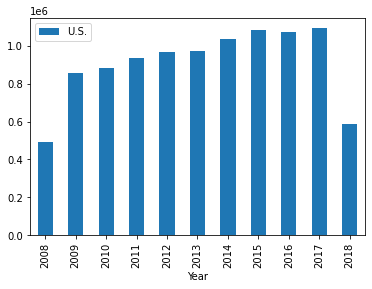

In [13]:
# We filter the yearly sums down to the U.S. and plot a bar chart
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind='bar')
# WE also have to set the x-Axis which si represented by the years
plot.set_xlabel('Year')

### Discarding rows using boolean indexing

---

Text(0.5, 0, 'Year')

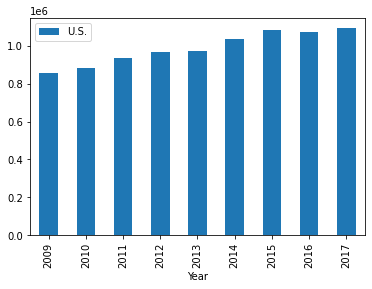

In [14]:
# We want to exclude the years 2018 and 2008 because there is just data for half of a year each and we want to focus on full year data
full_years = np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)
# We create a new dataframe using the yearly_gas dataframe and exclude the two years defined earlier
full_yearly_gas_df = yearly_gas_df[full_years]

# OR

full_years = yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017
full_years = full_years[0] & full_years[1]

# Finally we plot the new dataframe again which is now much clearer and less confusing
plot = full_yearly_gas_df.filter(items=['U.S.']).plot(kind='bar')
plot.set_xlabel('Year')

## State Production

---

Let's have a look at the yearly production of some specific states

In [15]:
# First we check with states are in the dataframe in order to pick some 
full_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

Text(0.5, 0, 'Year')

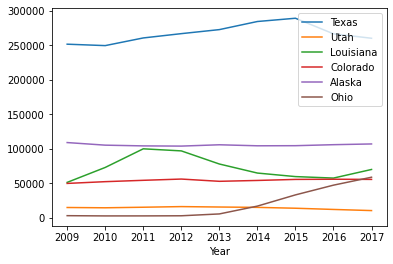

In [16]:
# Now we create a line chart (which is the default) with the states of our interest and show the plot
plot = full_yearly_gas_df.filter(items=['Texas', 'Utah', 'Louisiana', 'Colorado', 'Alaska', 'Ohio']).plot()
plot.set_xlabel('Year')

---

## Comparing with Crude Oil Production

In [34]:
# WE are creating another dataframe to investigate the crude oil information
file = "U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file, decimal=",")
oil_df.head(5)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [35]:
# Using the to_datetime function we transform the Month column into a datetime object
oil_df['Month'] = pd.to_datetime(oil_df['Month'], format='%Y-%m-%d')
oil_df

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2018-02-01,10248,17,513,14,0,463,428,1704,14,...,54,527,18,4,223,27,0,100,4015,1
117,2018-03-01,10461,17,512,14,0,462,428,1681,16,...,54,543,18,4,231,29,0,104,4185,1
118,2018-04-01,10475,17,497,14,0,465,447,1583,16,...,54,531,19,4,232,29,0,103,4222,1
119,2018-05-01,10443,16,496,14,0,464,447,1504,15,...,58,529,19,3,228,29,0,97,4245,1


Then create two dataframes yearly_gas and yearly_oil by grouping by year, summing and filtering the global production for both commodities. Rename the columns to Gas and Crude oil.

In [46]:
# First we need to clean the colum names of the oil dataframe because they have a trailing space and assign this change to the riginal dataframe
oil_df.rename(columns=lambda x: x.strip(), inplace=True)
oil_df.columns

Index(['Month', 'U.S. Crude Oil', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [50]:
# Now we can group, sum and filter the dataframes to generate the yearly U.S. wide productions for gas and oil
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum() \
    .filter(items=['U.S.'])
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum() \
    .filter(items=['U.S. Crude Oil'])

# Finally, we want to rename the columns to make the dataframe clearer
yearly_gas_df.columns = ['Gas']
yearly_oil_df.columns = ['Crude Oil']

yearly_oil_df.head(5)

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741
2011,67829
2012,78007


Now that you have those two dataframes, create one by concatenating both. Store this new dataframe into a yearly_merged variable. You should use the pd.concat(), and don’t forget to set the axis parameter!

In [55]:
# Using pandas concat method we are merging the two dataframes with the columns as axis
yearly_merged_df = pd.concat([yearly_gas_df, yearly_oil_df], axis='columns')

yearly_merged_df

,Gas,Crude Oil
Month,,
2008,489473,34211
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585
2014,1032439,105064
2015,1082158,113179
2016,1070085,105970


Finally, plot the yearly_merged dataframe and try to set the legend to include the units advertised in the original Kaggle dataset.

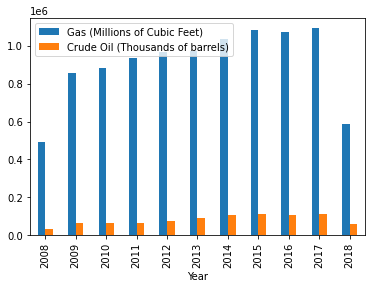

In [66]:
# First we create the bar chart itself
plot = yearly_merged_df.plot(kind='bar')
# Then we set the x-axis label to Year
plot.set_xlabel('Year')
# Finally, we adjust the legend with the original names
plot.legend(['Gas (Millions of Cubic Feet)', 'Crude Oil (Thousands of barrels)'])